In [1]:
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pylab as plt
from sklearn import datasets, ensemble, model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pandas as pd

In [2]:
# transforming csv into a DataFrame object
# import data and split
df_lag = pd.read_csv("rawdata.csv")
train_set = df_lag.iloc[:,0:48]
labels = df_lag.iloc[:,48:49]
X_train, X_test, y_train, y_test = model_selection.train_test_split(train_set, labels, random_state=0)



## Decision Tree

In [3]:
# model and fit
cls_t = tree.DecisionTreeClassifier()
cls_t.fit(X_train, y_train)
y_pred = cls_t.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.910025706940874

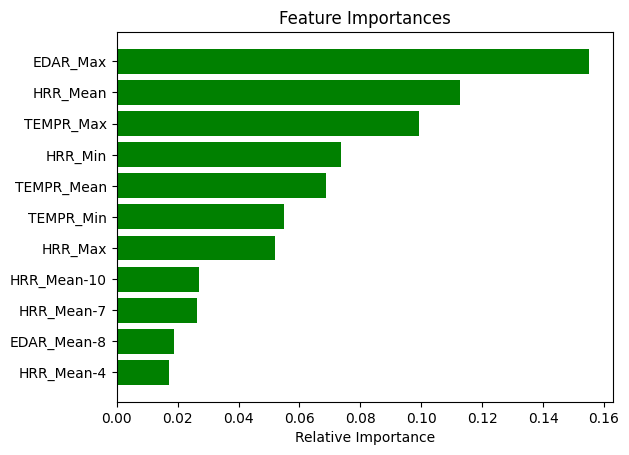

In [4]:
# -- feature importance graph
importances = cls_t.feature_importances_
indices = np.argsort(importances)
features = df_lag.columns
plt.title('Feature Importances')
j = 11   # top j importance
plt.barh(range(j), importances[indices][len(indices)-j:], color='g', align='center')
plt.yticks(range(j), [features[i] for i in indices[len(indices)-j:]])
plt.xlabel('Relative Importance')
plt.show()

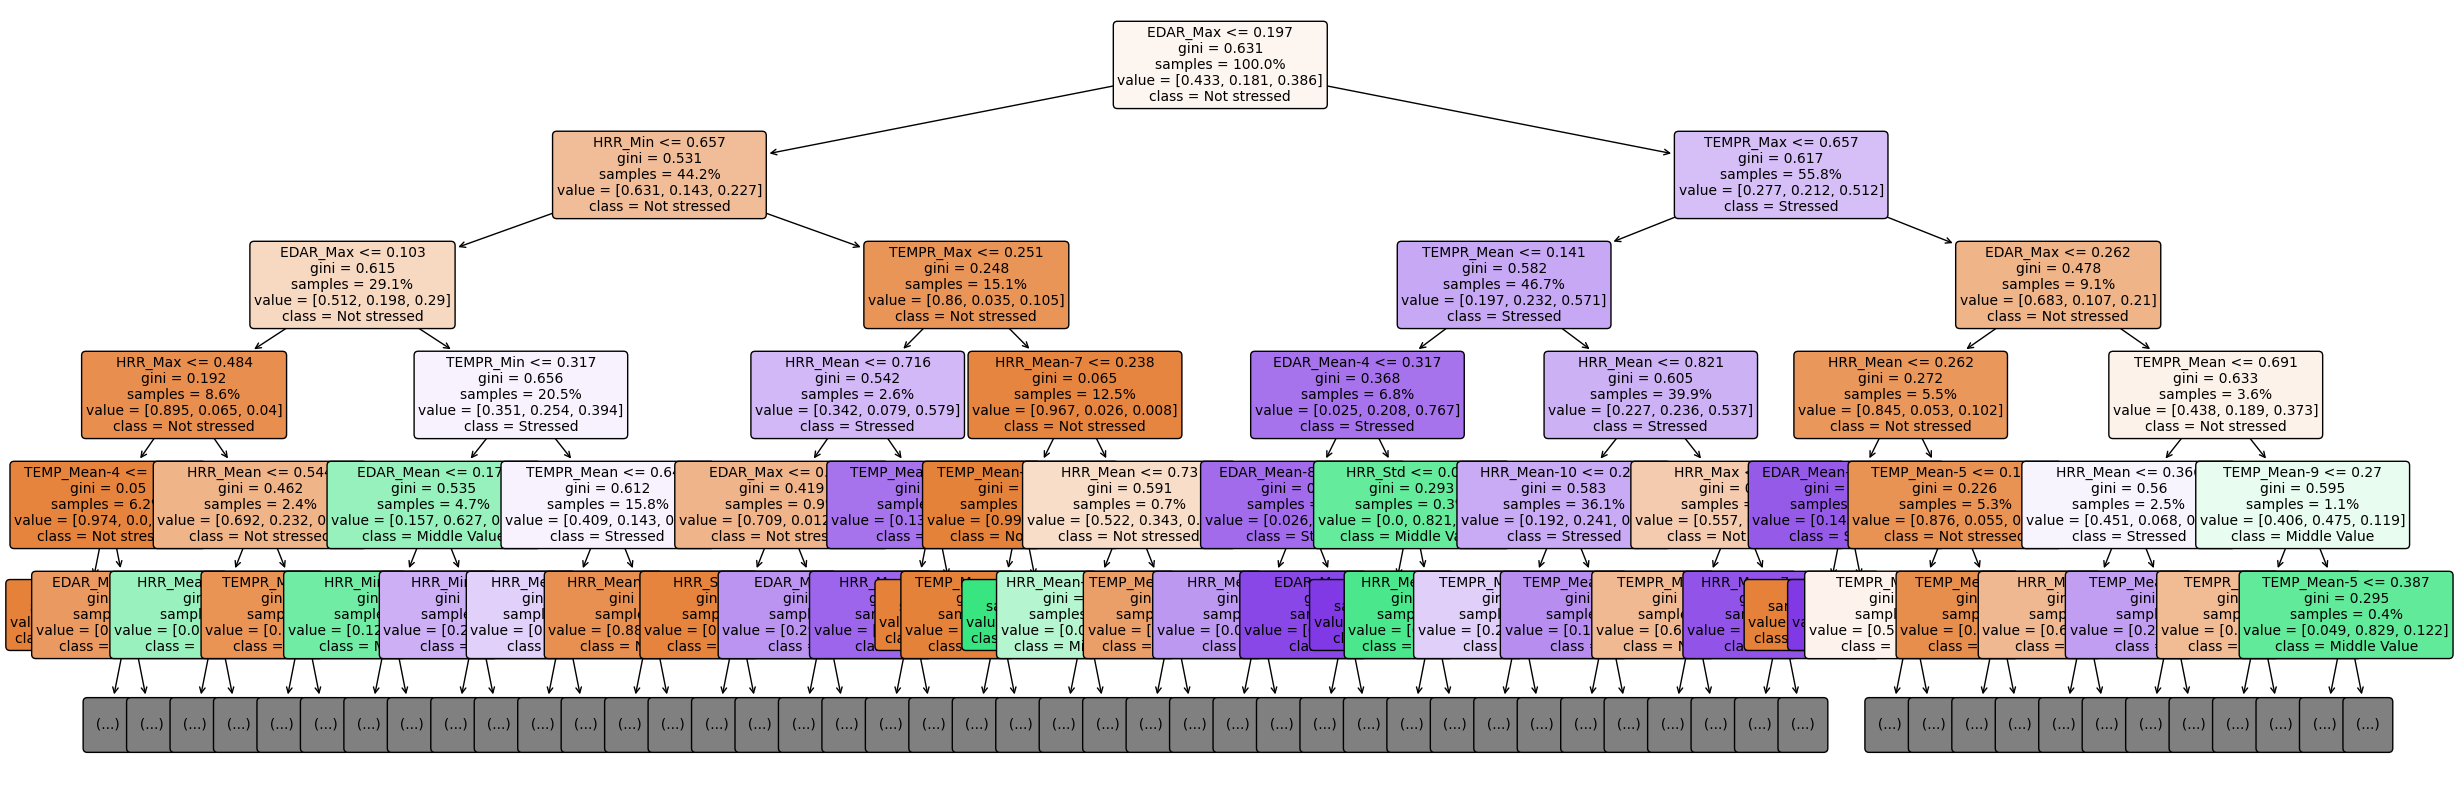

In [5]:
# visualização da arvore de decisões
fig = plt.figure(figsize=(30, 10))
vis = tree.plot_tree(cls_t, feature_names = df_lag.columns.to_list(), class_names = ['Not stressed', 'Middle Value', 'Stressed'], max_depth=5, fontsize=10, proportion=True, filled=True, rounded=True)
plt.savefig('tree4.eps',format='eps')

## Random Forest

In [6]:
# acurácia do rf
clf = RandomForestClassifier(random_state=42, n_estimators=50, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

C:\Users\luiza\AppData\Local\Temp\ipykernel_46964\1834918725.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


0.9652956298200515

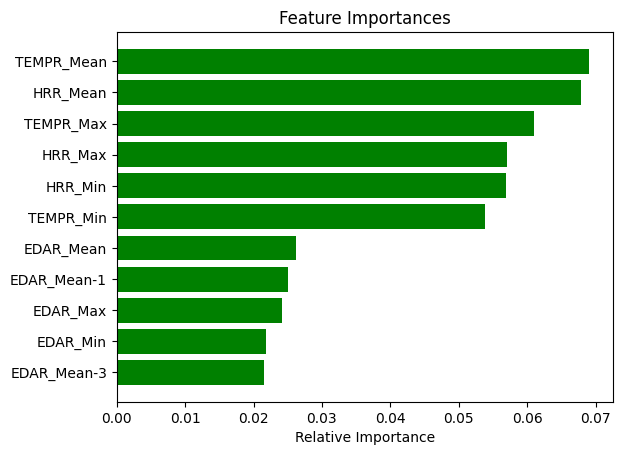

In [7]:
# -- feature importance graph
importances = clf.feature_importances_
indices = np.argsort(importances)
features = df_lag.columns
plt.title('Feature Importances')
j = 11   # top j importance
plt.barh(range(j), importances[indices][len(indices)-j:], color='g', align='center')
plt.yticks(range(j), [features[i] for i in indices[len(indices)-j:]])
plt.xlabel('Relative Importance')
plt.show()

In [8]:
#criação da arvore de decisoes
estimator = clf.estimators_[5]

from sklearn.tree import export_graphviz

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = df_lag.columns[:48].tolist(),
                class_names = ['Not stressed', 'Middle Value', 'Stressed'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# transformar em png 
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'tree.png')

## Explicável

In [9]:
import shap
# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(clf)

shap_values = explainer.shap_values(X_test)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


Variable Importance Plot - Global Interpretation


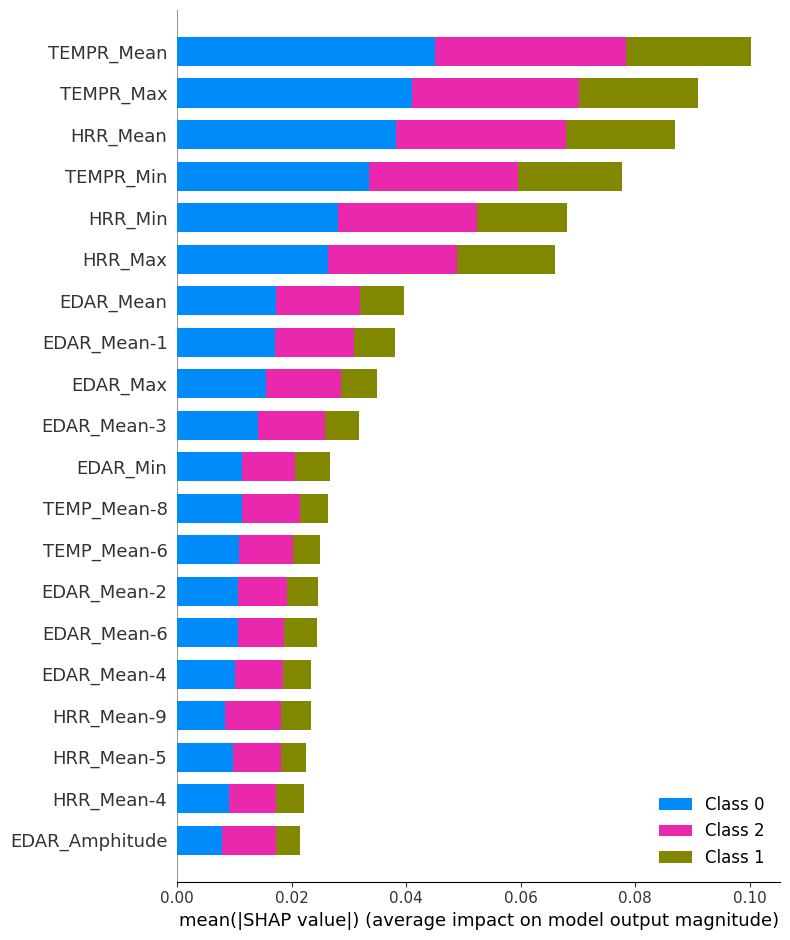

In [10]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

Summary Plot para a classe: Not stressed


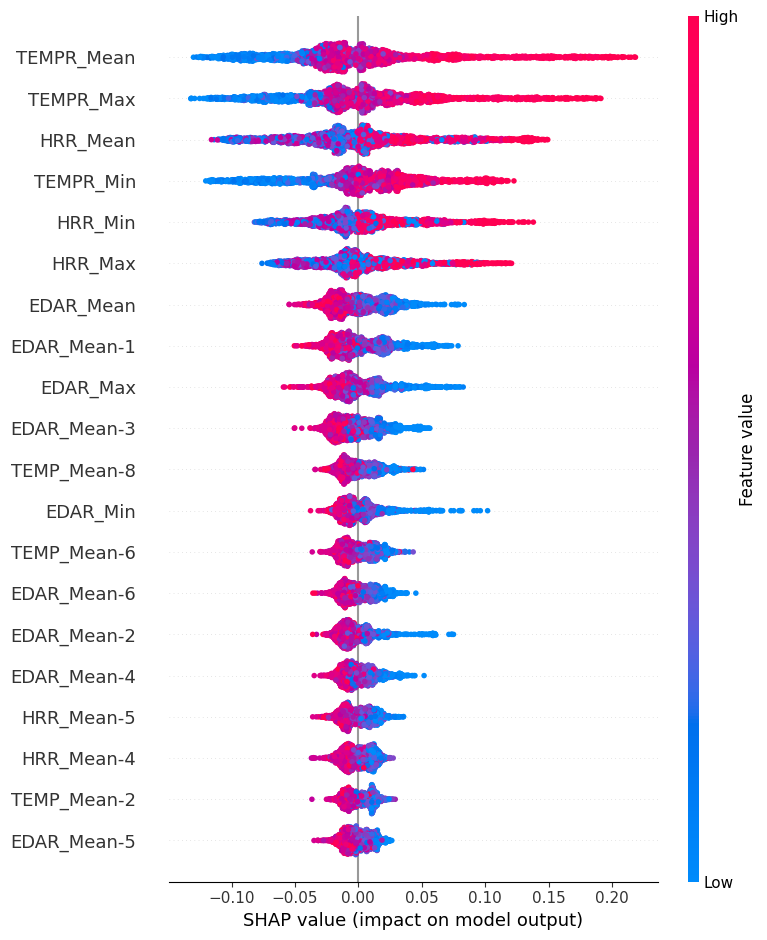

Summary Plot para a classe: Middle Value


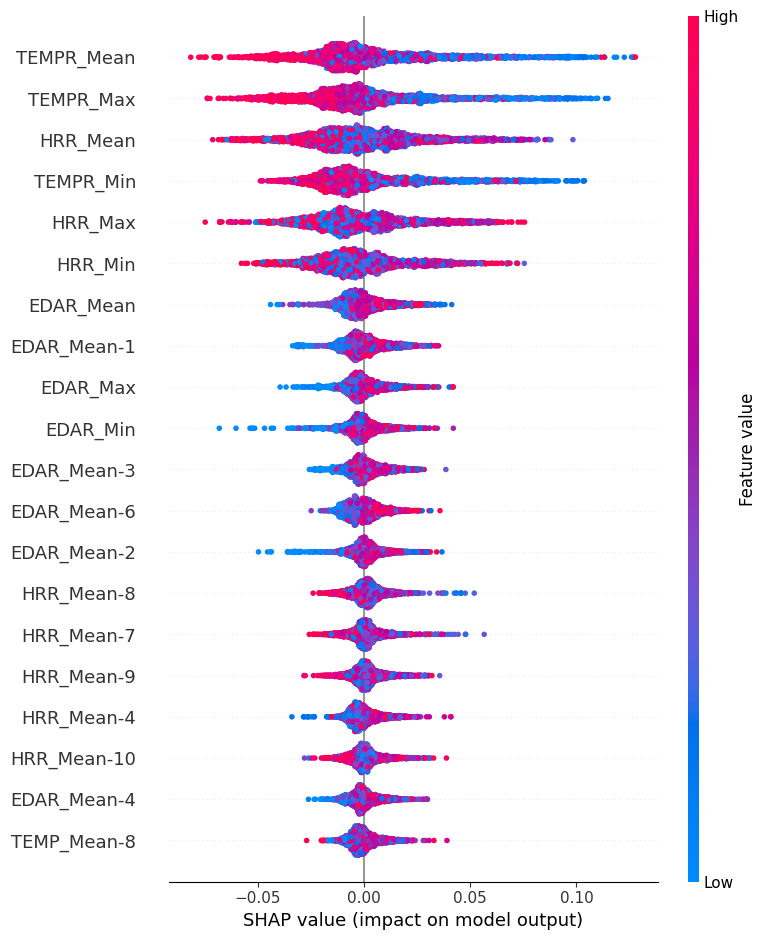

Summary Plot para a classe: Stressed


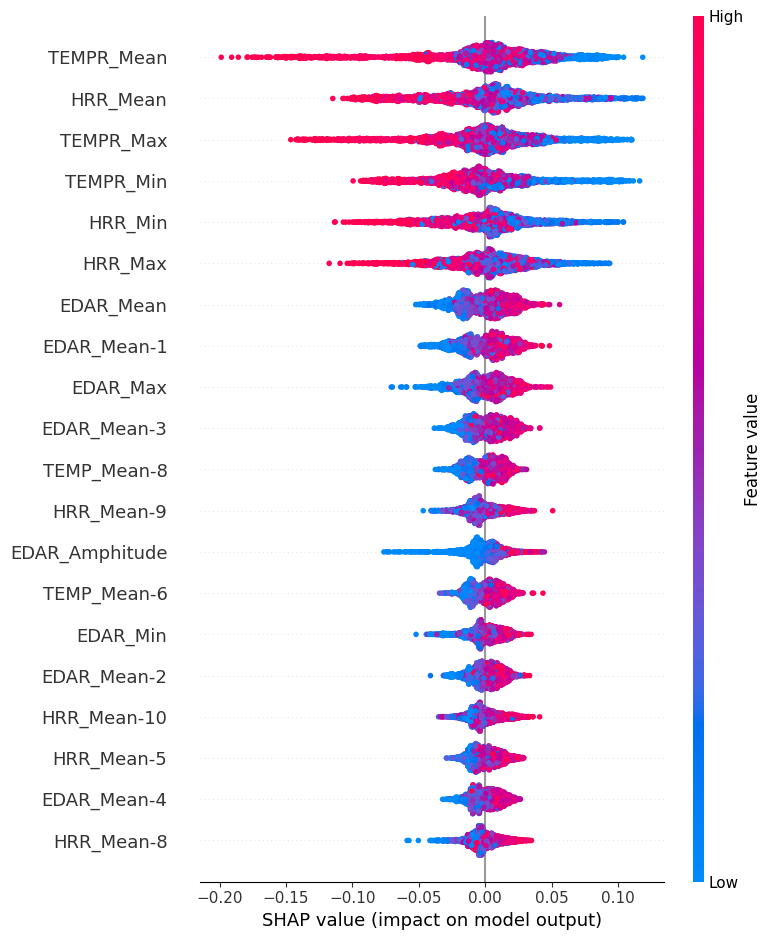

In [14]:
class_names = ['Not stressed', 'Middle Value', 'Stressed']
for class_index, class_name in enumerate(class_names):
    print("Summary Plot para a classe:", class_name)
    plt.figure()
    shap.summary_plot(shap_values[class_index], X_test, class_names=[class_name])
    plt.show()

In [18]:
from lime.lime_tabular import LimeTabularExplainer


# Get the feature names
feature_names = list(X_train.columns)

explainer = LimeTabularExplainer(X_train.values, feature_names = feature_names,class_names = class_names, mode = 'classification')
exp = explainer.explain_instance(X_test.iloc[0], clf.predict_proba, num_features=10, top_labels=3)
exp.show_in_notebook()

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


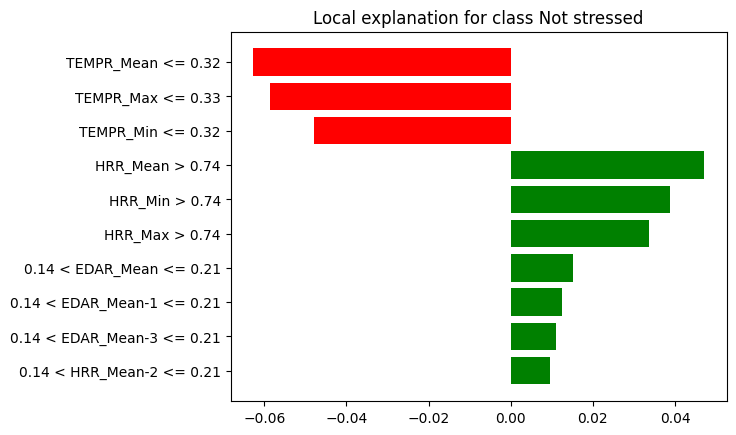

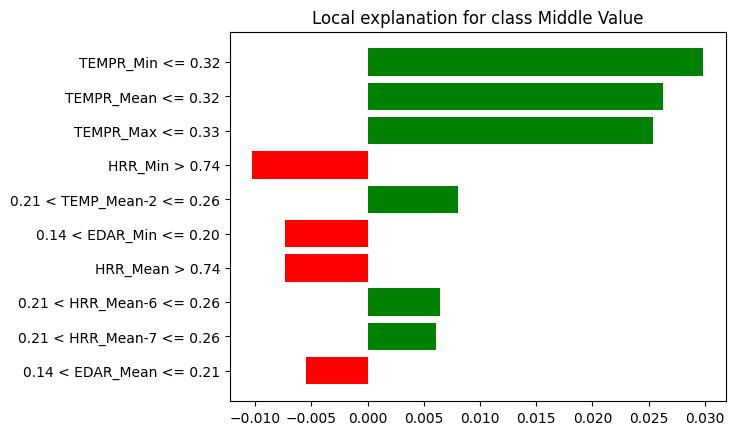

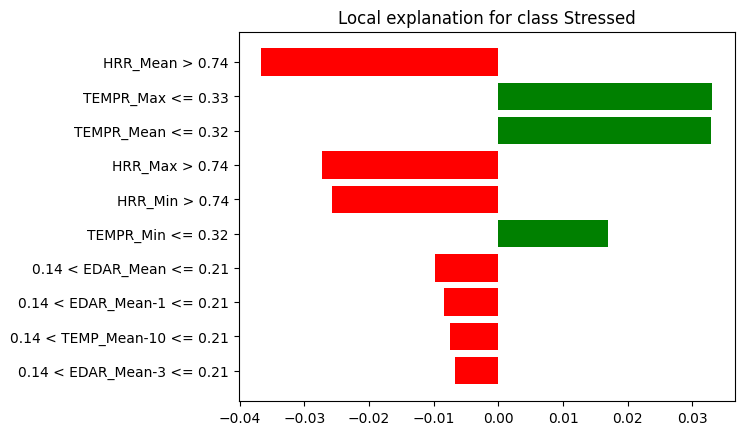

In [19]:
for i, class_names in enumerate(class_names):
    # Gerar explicação para a categoria atual
    exp = explainer.explain_instance(X_train.iloc[1, :], clf.predict_proba, num_features=10, labels=[i])
    
    # Gerar figura para a explicação atual
    fig = exp.as_pyplot_figure(label=i)

In [20]:
import shapash